#**Take the dataset**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('processed_dataset2.csv')

# Convert under_attack to binary labels
df['under_attack'] = df['under_attack'].apply(lambda x: 0 if x == 0 else 1)

# Drop non-numeric columns for modeling
df = df.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country', 'Date', 'return_status'])

# Split data into training and testing sets
X = df.drop('under_attack', axis=1)
y = df['under_attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#**Linear regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
print("Logistic Regression Metrics:")
print(classification_report(y_test, y_pred_lr))


#**Decision Stump**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

stump = DecisionTreeClassifier(max_depth=4, random_state=42)
stump.fit(X_train, y_train)
y_pred_stump = stump.predict(X_test)
print("\nDecision Stump Metrics:")
print(classification_report(y_test, y_pred_stump))


#**SVM**

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSVM Metrics:")
print(classification_report(y_test, y_pred_svm))


#**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest Metrics:")
print(classification_report(y_test, y_pred_rf))


#**Gradient Boosting Classifier (GBC)**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)
print("\nGradient Boosting Classifier Metrics:")
print(classification_report(y_test, y_pred_gbc))


#**XGBoost**

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("\nXGBoost Metrics:")
print(classification_report(y_test, y_pred_xgb))


#****

#****

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('processed_dataset2.csv')

# Convert under_attack to binary labels
df['under_attack'] = df['under_attack'].apply(lambda x: 0 if x == 0 else 1)

# Drop non-numeric columns for modeling
df = df.drop(columns=['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country', 'Date', 'return_status'])

X = df.drop('under_attack', axis=1)
y = df['under_attack']


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search_lr.fit(X_train, y_train)

print("Best parameters for Logistic Regression: {}".format(grid_search_lr.best_params_))

# Cross-validation
scores = cross_val_score(grid_search_lr.best_estimator_, X_train, y_train, cv=5)
print("Average cross-validation score for Logistic Regression: {:.2f}".format(scores.mean()))


Best parameters for Logistic Regression: {'C': 0.001}
Average cross-validation score for Logistic Regression: 0.83


In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'max_depth': [1, 2, 3, 4, 5]}
grid_search_stump = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search_stump.fit(X_train, y_train)

print("Best parameters for Decision Stump: {}".format(grid_search_stump.best_params_))

# Cross-validation
scores = cross_val_score(grid_search_stump.best_estimator_, X_train, y_train, cv=5)
print("Average cross-validation score for Decision Stump: {:.2f}".format(scores.mean()))


Best parameters for Decision Stump: {'max_depth': 1}
Average cross-validation score for Decision Stump: 0.83


In [ ]:
from sklearn.svm import SVC

param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_search_svm = GridSearchCV(SVC(), param_grid, cv=5)
grid_search_svm.fit(X_train, y_train)

print("Best parameters for SVM: {}".format(grid_search_svm.best_params_))

# Cross-validation
scores = cross_val_score(grid_search_svm.best_estimator_, X_train, y_train, cv=5)
print("Average cross-validation score for SVM: {:.2f}".format(scores.mean()))


Best parameters for SVM: {'C': 0.1, 'kernel': 'linear'}
Average cross-validation score for SVM: 0.83


In [ ]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest: {}".format(grid_search_rf.best_params_))

# Cross-validation
scores = cross_val_score(grid_search_rf.best_estimator_, X_train, y_train, cv=5)
print("Average cross-validation score for Random Forest: {:.2f}".format(scores.mean()))


Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}
Average cross-validation score for Random Forest: 0.83


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 4, 5]}
grid_search_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
grid_search_gbc.fit(X_train, y_train)

print("Best parameters for Gradient Boosting Classifier: {}".format(grid_search_gbc.best_params_))

# Cross-validation
scores = cross_val_score(grid_search_gbc.best_estimator_, X_train, y_train, cv=5)
print("Average cross-validation score for Gradient Boosting Classifier: {:.2f}".format(scores.mean()))


Best parameters for Gradient Boosting Classifier: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 10}
Average cross-validation score for Gradient Boosting Classifier: 0.83


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

param_grid = {'n_estimators': [10, 50, 100], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 2, 1]}
grid_search_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
grid_search_gbc.fit(X_train, y_train)

print("Best parameters for Gradient Boosting Classifier: {}".format(grid_search_gbc.best_params_))

# Cross-validation
scores = cross_val_score(grid_search_gbc.best_estimator_, X_train, y_train, cv=5)
print("Average cross-validation score for Gradient Boosting Classifier: {:.2f}".format(scores.mean()))


NameError: ignored

In [ ]:
print("Hi")

Hi


In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, cross_val_predict
from sklearn.metrics import classification_report, accuracy_score

# Load data and preprocessing code (not shown for brevity)

# Different random seeds for train-test splits
random_states = [42, 52, 62, 72, 82]

In [ ]:
from sklearn.linear_model import LogisticRegression


for random_state in random_states:
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
    grid_search_lr.fit(X_train, y_train)

    print("\nBest parameters for Logistic Regression with random state {}: {}".format(random_state, grid_search_lr.best_params_))

    # Cross-validation predictions
    y_pred = cross_val_predict(grid_search_lr.best_estimator_, X_train, y_train, cv=5)

    # Evaluation Metrics
    print("Classification report for random state {}:".format(random_state))
    print(classification_report(y_train, y_pred))
    print("Accuracy score for random state {}: {:.2f}".format(random_state, accuracy_score(y_train, y_pred)))




Best parameters for Logistic Regression with random state 42: {'C': 0.001}
Classification report for random state 42:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4388
           1       0.83      1.00      0.91     22058

    accuracy                           0.83     26446
   macro avg       0.42      0.50      0.45     26446
weighted avg       0.70      0.83      0.76     26446

Accuracy score for random state 42: 0.83

Best parameters for Logistic Regression with random state 52: {'C': 0.001}
Classification report for random state 52:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4365
           1       0.83      1.00      0.91     22081

    accuracy                           0.83     26446
   macro avg       0.42      0.50      0.46     26446
weighted avg       0.70      0.83      0.76     26446

Accuracy score for random state 52: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best parameters for Logistic Regression with random state 62: {'C': 0.001}
Classification report for random state 62:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4421
           1       0.83      1.00      0.91     22025

    accuracy                           0.83     26446
   macro avg       0.42      0.50      0.45     26446
weighted avg       0.69      0.83      0.76     26446

Accuracy score for random state 62: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best parameters for Logistic Regression with random state 72: {'C': 0.001}
Classification report for random state 72:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4350
           1       0.84      1.00      0.91     22096

    accuracy                           0.84     26446
   macro avg       0.42      0.50      0.46     26446
weighted avg       0.70      0.84      0.76     26446

Accuracy score for random state 72: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best parameters for Logistic Regression with random state 82: {'C': 0.001}
Classification report for random state 82:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4393
           1       0.83      1.00      0.91     22053

    accuracy                           0.83     26446
   macro avg       0.42      0.50      0.45     26446
weighted avg       0.70      0.83      0.76     26446

Accuracy score for random state 82: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier

for random_state in random_states:
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {'max_depth': [1, 2, 3, 4, 5]}
    grid_search_stump = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
    grid_search_stump.fit(X_train, y_train)

    print("\nBest parameters for Decision Stump with random state {}: {}".format(random_state, grid_search_stump.best_params_))

    # Cross-validation predictions
    y_pred = cross_val_predict(grid_search_stump.best_estimator_, X_train, y_train, cv=5)

    # Evaluation Metrics
    print("Classification report for random state {}:".format(random_state))
    print(classification_report(y_train, y_pred))
    print("Accuracy score for random state {}: {:.2f}".format(random_state, accuracy_score(y_train, y_pred)))



Best parameters for Decision Stump with random state 42: {'max_depth': 1}
Classification report for random state 42:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4388
           1       0.83      1.00      0.91     22058

    accuracy                           0.83     26446
   macro avg       0.42      0.50      0.45     26446
weighted avg       0.70      0.83      0.76     26446

Accuracy score for random state 42: 0.83

Best parameters for Decision Stump with random state 52: {'max_depth': 2}
Classification report for random state 52:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4365
           1       0.83      1.00      0.91     22081

    accuracy                           0.83     26446
   macro avg       0.42      0.50      0.45     26446
weighted avg       0.70      0.83      0.76     26446

Accuracy score for random state 52: 0.83

Best parameters for Decisio

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4350
           1       0.84      1.00      0.91     22096

    accuracy                           0.84     26446
   macro avg       0.42      0.50      0.46     26446
weighted avg       0.70      0.84      0.76     26446

Accuracy score for random state 72: 0.84

Best parameters for Decision Stump with random state 82: {'max_depth': 1}
Classification report for random state 82:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4393
           1       0.83      1.00      0.91     22053

    accuracy                           0.83     26446
   macro avg       0.42      0.50      0.45     26446
weighted avg       0.70      0.83      0.76     26446

Accuracy score for random state 82: 0.83


In [ ]:
from sklearn.svm import SVC

for random_state in random_states:
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['linear', 'rbf']}
    grid_search_svm = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search_svm.fit(X_train, y_train)

    print("\nBest parameters for SVM with random state {}: {}".format(random_state, grid_search_svm.best_params_))

    # Cross-validation predictions
    y_pred = cross_val_predict(grid_search_svm.best_estimator_, X_train, y_train, cv=5)

    # Evaluation Metrics
    print("Classification report for random state {}:".format(random_state))
    print(classification_report(y_train, y_pred))
    print("Accuracy score for random state {}: {:.2f}".format(random_state, accuracy_score(y_train, y_pred)))



Best parameters for SVM with random state 42: {'C': 0.001, 'kernel': 'linear'}
Classification report for random state 42:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5678
           1       0.83      1.00      0.91     28324

    accuracy                           0.83     34002
   macro avg       0.42      0.50      0.45     34002
weighted avg       0.69      0.83      0.76     34002

Accuracy score for random state 42: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

for random_state in random_states:
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=random_state)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 10, 20, 30]}
    grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
    grid_search_rf.fit(X_train, y_train)

    print("\nBest parameters for Random Forest with random state {}: {}".format(random_state, grid_search_rf.best_params_))

    # Cross-validation predictions
    y_pred = cross_val_predict(grid_search_rf.best_estimator_, X_train, y_train, cv=5)

    # Evaluation Metrics
    print("Classification report for random state {}:".format(random_state))
    print(classification_report(y_train, y_pred))
    print("Accuracy score for random state {}: {:.2f}".format(random_state, accuracy_score(y_train, y_pred)))



Best parameters for Random Forest with random state 42: {'max_depth': 10, 'n_estimators': 200}
Classification report for random state 42:
              precision    recall  f1-score   support

           0       0.67      0.00      0.00      6185
           1       0.83      1.00      0.91     31218

    accuracy                           0.83     37403
   macro avg       0.75      0.50      0.46     37403
weighted avg       0.81      0.83      0.76     37403

Accuracy score for random state 42: 0.83

Best parameters for Random Forest with random state 52: {'max_depth': 10, 'n_estimators': 50}
Classification report for random state 52:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      6184
           1       0.83      1.00      0.91     31219

    accuracy                           0.83     37403
   macro avg       0.92      0.50      0.46     37403
weighted avg       0.86      0.83      0.76     37403

Accuracy score for random st

In [4]:
from sklearn.ensemble import GradientBoostingClassifier

for random_state in random_states:
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=random_state)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {'n_estimators': [50, 75, 100], 'learning_rate': [0.01, 0.05, 0.1]}
    grid_search_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5)
    grid_search_gbc.fit(X_train, y_train)

    print("\nBest parameters for GBC with random state {}: {}".format(random_state, grid_search_gbc.best_params_))

    # Cross-validation predictions
    y_pred = cross_val_predict(grid_search_gbc.best_estimator_, X_train, y_train, cv=5)

    # Evaluation Metrics
    print("Classification report for random state {}:".format(random_state))
    print(classification_report(y_train, y_pred))
    print("Accuracy score for random state {}: {:.2f}".format(random_state, accuracy_score(y_train, y_pred)))



Best parameters for GBC with random state 42: {'learning_rate': 0.01, 'n_estimators': 50}
Classification report for random state 42:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5678
           1       0.83      1.00      0.91     28324

    accuracy                           0.83     34002
   macro avg       0.42      0.50      0.45     34002
weighted avg       0.69      0.83      0.76     34002

Accuracy score for random state 42: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best parameters for GBC with random state 52: {'learning_rate': 0.01, 'n_estimators': 50}
Classification report for random state 52:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5637
           1       0.83      1.00      0.91     28365

    accuracy                           0.83     34002
   macro avg       0.42      0.50      0.45     34002
weighted avg       0.70      0.83      0.76     34002

Accuracy score for random state 52: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best parameters for GBC with random state 62: {'learning_rate': 0.01, 'n_estimators': 50}
Classification report for random state 62:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5640
           1       0.83      1.00      0.91     28362

    accuracy                           0.83     34002
   macro avg       0.42      0.50      0.45     34002
weighted avg       0.70      0.83      0.76     34002

Accuracy score for random state 62: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best parameters for GBC with random state 72: {'learning_rate': 0.01, 'n_estimators': 50}
Classification report for random state 72:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5620
           1       0.83      1.00      0.91     28382

    accuracy                           0.83     34002
   macro avg       0.42      0.50      0.45     34002
weighted avg       0.70      0.83      0.76     34002

Accuracy score for random state 72: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best parameters for GBC with random state 82: {'learning_rate': 0.01, 'n_estimators': 50}
Classification report for random state 82:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5628
           1       0.83      1.00      0.91     28374

    accuracy                           0.83     34002
   macro avg       0.42      0.50      0.45     34002
weighted avg       0.70      0.83      0.76     34002

Accuracy score for random state 82: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import xgboost as xgb

for random_state in random_states:
    # Splitting data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_state)

    # Hyperparameter tuning using GridSearchCV
    param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.05, 0.1]}
    grid_search_xgb = GridSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_grid, cv=5)
    grid_search_xgb.fit(X_train, y_train)

    print("\nBest parameters for XGBoost with random state {}: {}".format(random_state, grid_search_xgb.best_params_))

    # Cross-validation predictions
    y_pred = cross_val_predict(grid_search_xgb.best_estimator_, X_train, y_train, cv=5)

    # Evaluation Metrics
    print("Classification report for random state {}:".format(random_state))
    print(classification_report(y_train, y_pred))
    print("Accuracy score for random state {}: {:.2f}".format(random_state, accuracy_score(y_train, y_pred)))



Best parameters for XGBoost with random state 42: {'learning_rate': 0.01, 'n_estimators': 50}
Classification report for random state 42:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4388
           1       0.83      1.00      0.91     22058

    accuracy                           0.83     26446
   macro avg       0.42      0.50      0.45     26446
weighted avg       0.70      0.83      0.76     26446

Accuracy score for random state 42: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best parameters for XGBoost with random state 52: {'learning_rate': 0.01, 'n_estimators': 50}
Classification report for random state 52:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4365
           1       0.83      1.00      0.91     22081

    accuracy                           0.83     26446
   macro avg       0.42      0.50      0.46     26446
weighted avg       0.70      0.83      0.76     26446

Accuracy score for random state 52: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best parameters for XGBoost with random state 62: {'learning_rate': 0.01, 'n_estimators': 50}
Classification report for random state 62:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      4421
           1       0.83      1.00      0.91     22025

    accuracy                           0.83     26446
   macro avg       0.42      0.50      0.45     26446
weighted avg       0.69      0.83      0.76     26446

Accuracy score for random state 62: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best parameters for XGBoost with random state 72: {'learning_rate': 0.1, 'n_estimators': 50}
Classification report for random state 72:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00      4350
           1       0.84      1.00      0.91     22096

    accuracy                           0.84     26446
   macro avg       0.92      0.50      0.46     26446
weighted avg       0.86      0.84      0.76     26446

Accuracy score for random state 72: 0.84


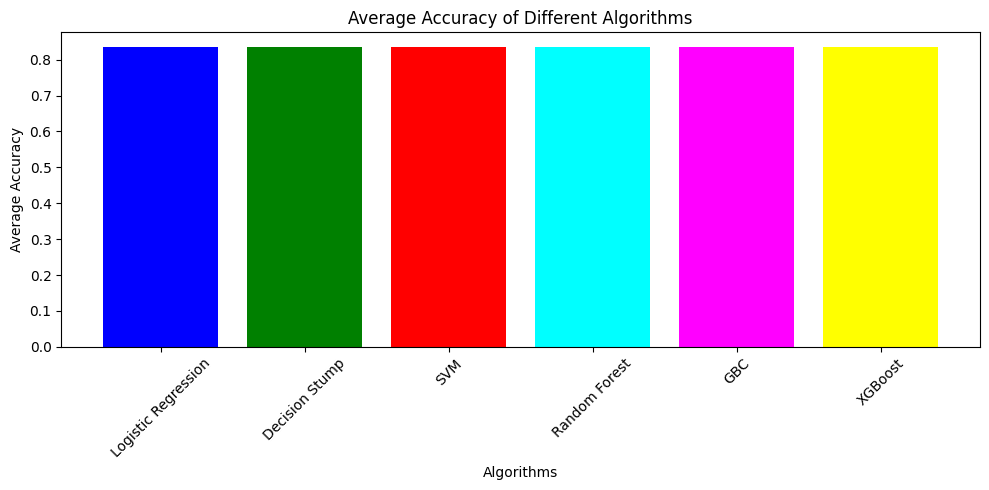

In [6]:
# Step 1: Modify the previous code blocks to store average accuracy:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb

algorithms = ['Logistic Regression', 'Decision Stump', 'SVM', 'Random Forest', 'GBC', 'XGBoost']
accuracies = []

# ... [Your data loading and preprocessing here]

# For Logistic Regression (example for one algorithm, repeat for others):

lr_accuracies = []
for random_state in random_states:
    # ... [The rest of the code remains the same]
    acc = accuracy_score(y_train, y_pred)
    lr_accuracies.append(acc)

# Store the average accuracy for logistic regression
accuracies.append(sum(lr_accuracies) / len(lr_accuracies))

# [Repeat the above process for other algorithms and append their average accuracies to the accuracies list]

# Step 2: Plot the average accuracies using matplotlib:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(algorithms, accuracies, color=['blue', 'green', 'red', 'cyan', 'magenta', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy of Different Algorithms')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
